# LSTM қолдану арқылы Қазақстанда COVID19 уақыт қатарларын болжау

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# Интернеттегі соңғы расталған жағдайларды шығару

In [2]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df_confirmed=pd.read_csv(url)
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900


In [3]:
df_confirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,198,201,201,215,215,218,218,234,234,249
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,1867223,1874801,1885210,1896053,1905524,1915362,1922264,1927239,1933853,1943548
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,166036,166094,166232,166427,166669,166728,166901,167026,167088,167231
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,118,118,118,118,118,118,118,118,118,118
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5090,5091,5093,5096,5099,5101,5104,5110,5112,5114


# Қазақстанда аурудың расталған жағдайлары

In [4]:
country="Kazakhstan"
df_confirmed1=df_confirmed[df_confirmed["Country/Region"]==country]
df_confirmed1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
156,NaN,Kazakhstan,48.0196,66.9237,0,0,0,0,0,0,...,225891,227165,228692,230188,231716,233156,234569,235844,237029,238364


# Уақыт қатарының объектісіне деректер түрін қамту

In [5]:
df_confirmed2=pd.DataFrame(df_confirmed1[df_confirmed1.columns[4:]].sum(),columns=["Расталған Жағдайлар"])
df_confirmed2.index=pd.to_datetime(df_confirmed2.index,format='%m/%d/%y')
df_confirmed2.tail()

,Расталған Жағдайлар
2021-01-29,233156
2021-01-30,234569
2021-01-31,235844
2021-02-01,237029
2021-02-02,238364


# Жалпы өлім жағдайларын және қалпына келтірілген жағдайларды алдын-ала талдау үшін жинау

In [6]:
df_dead=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_dead.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2378,2385,2389,2389,2397,2399,2400,2400,2404,2405
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1315,1324,1332,1339,1350,1358,1369,1380,1393,1398
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2863,2866,2871,2877,2881,2884,2888,2891,2894,2898
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,96,97,97,98,100,100,101,101,101,102
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,459,461,462,462,464,464,464,466,466,468


In [7]:
df_dead1=df_dead[df_dead["Country/Region"]==country]
df_dead2=pd.DataFrame(df_dead1[df_dead1.columns[4:]].sum(),columns=["Қайтыс болған"])
df_dead2.index=pd.to_datetime(df_dead2.index,format='%m/%d/%y')
df_dead2.tail()

,Қайтыс болған
2021-01-29,3042
2021-01-30,3045
2021-01-31,3046
2021-02-01,3046
2021-02-02,3047


In [8]:
df_recovered=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,47298,47365,47459,47549,47583,47606,47609,47679,47723,47798
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,43890,44291,44880,45383,45906,46420,46927,47424,47922,48377
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,71945,72143,72336,72538,72745,72956,73152,73344,73530,73732
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,8652,8724,8774,8851,8942,8986,9045,9093,9206,9252
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,17266,17327,17388,17602,17692,17918,18015,18035,18180,18232


# Қазақстан үшін деректер жиынтығын құру

In [9]:
df_recovered1=df_recovered[df_recovered["Country/Region"]==country]
df_recovered1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21
141,NaN,Kazakhstan,48.0196,66.9237,0,0,0,0,0,0,...,195496,196978,198504,199667,201105,202652,203657,204668,205991,207328


In [10]:
df_recovered2 = pd.DataFrame(df_recovered1[df_recovered1.columns[4:]].sum(),columns=["Сауыққан"])
df_recovered2.index = pd.to_datetime(df_recovered2.index,format='%m/%d/%y')
df_recovered2.tail()

,Сауыққан
2021-01-29,202652
2021-01-30,203657
2021-01-31,204668
2021-02-01,205991
2021-02-02,207328


In [11]:
df_conf_dead = df_confirmed2.join(df_dead2,how = "inner")
df_conf_dead.tail()

,Расталған Жағдайлар,Қайтыс болған
2021-01-29,233156,3042
2021-01-30,234569,3045
2021-01-31,235844,3046
2021-02-01,237029,3046
2021-02-02,238364,3047


In [12]:
df_allcases=df_conf_dead.join(df_recovered2,how="inner")
df_allcases.tail()

,Расталған Жағдайлар,Қайтыс болған,Сауыққан
2021-01-29,233156,3042,202652
2021-01-30,234569,3045,203657
2021-01-31,235844,3046,204668
2021-02-01,237029,3046,205991
2021-02-02,238364,3047,207328


<AxesSubplot:title={'center':'Қазақстан'}>

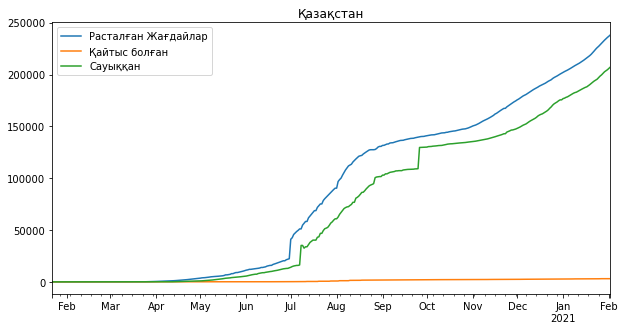

In [13]:
df_allcases.plot(figsize=(10,5),title="Қазақстан")

<AxesSubplot:title={'center':'Қазақстан-аурудың расталған жағдайлары'}>

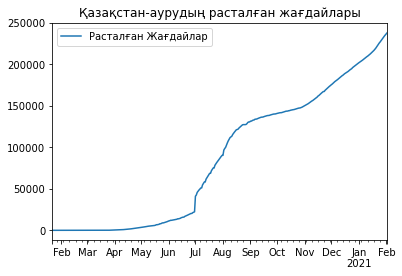

In [14]:
df_confirmed2.plot(title="Қазақстан-аурудың расталған жағдайлары")

# Деректерді алдын-ала өңдеу

In [15]:
df_new = df_confirmed2[["Расталған Жағдайлар"]]
df_new.tail(10)

,Расталған Жағдайлар
2021-01-24,225891
2021-01-25,227165
2021-01-26,228692
2021-01-27,230188
2021-01-28,231716
2021-01-29,233156
2021-01-30,234569
2021-01-31,235844
2021-02-01,237029
2021-02-02,238364


In [16]:
len(df_new)

378

In [17]:
x=len(df_new)-5
x

373

In [18]:
train=df_new.iloc[51:x]
test = df_new.iloc[x:]
train.tail()

,Расталған Жағдайлар
2021-01-24,225891
2021-01-25,227165
2021-01-26,228692
2021-01-27,230188
2021-01-28,231716


# Уақыт қатарларының мәліметтер жиынтығында маусымдық болғандықтан, болжам жасау үшін деректердегі маусымдылықты жою керек

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
dcmp=seasonal_decompose(train)

In [21]:
trend=dcmp.trend
seasonal=dcmp.seasonal

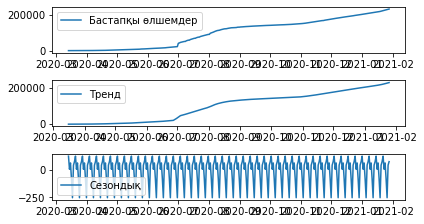

In [22]:
plt.subplot(411)
plt.plot(train,label='Бастапқы өлшемдер')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Тренд')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Сезондық')
plt.legend(loc='best')

plt.tight_layout()

# Деректерді қалыпқа келтіру

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# MinMaxScaler көмегімен түзету және түрлендіру

In [24]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
print(scaled_train[-5:])

[[0.97486103]
 [0.98035924]
 [0.98694932]
 [0.99340561]
 [1.        ]]


In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
scaled_train.shape

(322, 1)

In [28]:
n_input = 5
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size=1)

In [29]:
len(scaled_train)

322

In [30]:
len(generator)

317

In [31]:
x,y = generator[50]

In [32]:
(x.shape,y.shape)

((1, 5, 1), (1, 1))

In [33]:
(x,y)

(array([[[0.0166284 ],
         [0.01690029],
         [0.01745702],
         [0.01813027],
         [0.01906677]]]),
 array([[0.01974002]]))

In [34]:
y

array([[0.01974002]])

# Модель құру

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation

In [36]:
model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
model.add(Dense(225, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer="adam",loss="mse")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 225)               33975     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 226       
Total params: 125,401
Trainable params: 125,401
Non-trainable params: 0
_________________________________________________________________


In [38]:
validation_set = np.append(scaled_train[320],scaled_test)
validation_set=validation_set.reshape(6,1)
validation_set

array([[0.99340561],
       [1.00621461],
       [1.0123127 ],
       [1.01781522],
       [1.02292933],
       [1.02869079]])

In [39]:
n_input = 5
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length=5,batch_size=1)

In [40]:
validation_gen[0][0].shape,validation_gen[0][1].shape

((1, 5, 1), (1, 1))

# Модельді оқыту

In [41]:
model.fit_generator(generator,validation_data=validation_gen,epochs=100,steps_per_epoch=10)

Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
10/10 [==============================] - 1s 127ms/step - loss: 0.1736 - val_loss: 0.4347
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0356 - val_loss: 0.0438
Epoch 3/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0171 - val_loss: 0.0013
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0043 - val_loss: 0.0368
Epoch 5/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0066 - val_loss: 3.3284e-05
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0010 - val_loss: 1.3472e-07
Epoch 7/100
10/10 [==============================] - 0s 19ms/step - loss: 1.8997e-04 - val_loss: 7.4042e-06
Epoch 8/100
10/10 [==============================] - 0s 17ms/step - loss: 2.9360e-04 - val_loss: 4.9694e-08
Epoch 9/100
10/10 [==============================] - 0s 17ms/step - loss: 1.4314e

Epoch 74/100
10/10 [==============================] - 0s 17ms/step - loss: 5.4452e-05 - val_loss: 2.9332e-04
Epoch 75/100
10/10 [==============================] - 0s 17ms/step - loss: 7.1174e-04 - val_loss: 5.3512e-06
Epoch 76/100
10/10 [==============================] - 0s 20ms/step - loss: 2.7851e-04 - val_loss: 6.5445e-08
Epoch 77/100
10/10 [==============================] - 0s 17ms/step - loss: 2.1160e-04 - val_loss: 1.1784e-04
Epoch 78/100
10/10 [==============================] - 0s 20ms/step - loss: 4.5452e-04 - val_loss: 7.8690e-04
Epoch 79/100
10/10 [==============================] - 0s 17ms/step - loss: 9.7379e-05 - val_loss: 7.3326e-05
Epoch 80/100
10/10 [==============================] - 0s 17ms/step - loss: 4.3212e-05 - val_loss: 6.0211e-05
Epoch 81/100
10/10 [==============================] - 0s 17ms/step - loss: 6.2221e-05 - val_loss: 1.3816e-04
Epoch 82/100
10/10 [==============================] - 0s 17ms/step - loss: 5.0275e-05 - val_loss: 7.7414e-08
Epoch 83/100
10/10 

# Модельдің Жұмысын Тексеру

<AxesSubplot:title={'center':'Эпоха мен жоғалту қисығының графигі'}>

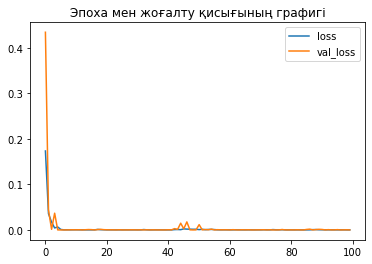

In [42]:
pd.DataFrame(model.history.history).plot(title="Эпоха мен жоғалту қисығының графигі")

In [43]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

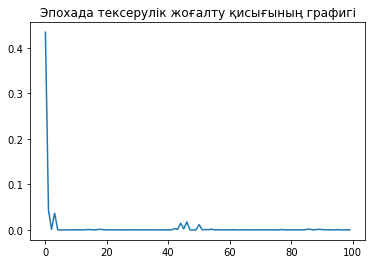

In [44]:
myloss = model.history.history["val_loss"]
plt.title("Эпохада тексерулік жоғалту қисығының графигі")
plt.plot(range(len(myloss)),myloss)

# Ауруды болжау

In [45]:
test_prediction = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1,n_input,n_features)
current_batch.shape

(1, 5, 1)

In [46]:
for i in range(len(test)+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
test_prediction

[array([1.0092775], dtype=float32),
 array([1.0167706], dtype=float32),
 array([1.0246234], dtype=float32),
 array([1.0327464], dtype=float32),
 array([1.0412021], dtype=float32),
 array([1.050026], dtype=float32),
 array([1.0588452], dtype=float32),
 array([1.0679532], dtype=float32),
 array([1.0773402], dtype=float32),
 array([1.0870104], dtype=float32),
 array([1.0969647], dtype=float32),
 array([1.1071944], dtype=float32)]

# Шыққан нәтижені қорытындылау және көрсету

In [47]:
true_prediction = scaler.inverse_transform(test_prediction)
true_prediction[:,0]

array([233865.69949722, 235601.94956207, 237421.53587341, 239303.74176407,
       241263.01365662, 243307.63821793, 245351.1302681 , 247461.57858658,
       249636.66290665, 251877.3500061 , 254183.88848495, 256554.23429871])

In [48]:
time_series_array = test.index
for k in range(0,7):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))
time_series_array

DatetimeIndex(['2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09'],
              dtype='datetime64[ns]', freq=None)

In [49]:
df_forecast = pd.DataFrame(columns=["Расталған Жағдайлар","Болжамдалған Жағдайлар"],index=time_series_array)
df_forecast

,Расталған Жағдайлар,Болжамдалған Жағдайлар
2021-01-29,NaN,NaN
2021-01-30,NaN,NaN
2021-01-31,NaN,NaN
2021-02-01,NaN,NaN
2021-02-02,NaN,NaN
2021-02-03,NaN,NaN
2021-02-04,NaN,NaN
2021-02-05,NaN,NaN
2021-02-06,NaN,NaN
2021-02-07,NaN,NaN


In [50]:
df_forecast.loc[:,"Болжамдалған Жағдайлар"] = true_prediction[:,0]
df_forecast.loc[:,"Расталған Жағдайлар"] = test["Расталған Жағдайлар"]
df_forecast

,Расталған Жағдайлар,Болжамдалған Жағдайлар
2021-01-29,233156.0,233865.699497
2021-01-30,234569.0,235601.949562
2021-01-31,235844.0,237421.535873
2021-02-01,237029.0,239303.741764
2021-02-02,238364.0,241263.013657
2021-02-03,NaN,243307.638218
2021-02-04,NaN,245351.130268
2021-02-05,NaN,247461.578587
2021-02-06,NaN,249636.662907
2021-02-07,NaN,251877.350006


<AxesSubplot:title={'center':'Қазақстан алдағы 7 күнге арналған болжамдар'}>

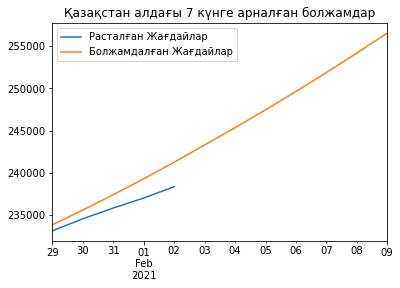

In [51]:
df_forecast.plot(title="Қазақстан алдағы 7 күнге арналған болжамдар")

# MAPE- статистикадағы болжау әдісін болжау дәлдігінің өлшемі

In [52]:
MAPE = np.mean(np.abs(np.array(df_forecast["Расталған Жағдайлар"][:5]) - np.array(df_forecast["Болжамдалған Жағдайлар"][:5]))/np.array(df_forecast["Расталған Жағдайлар"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 0.717908110988875 %


# MSE

In [53]:
sum_errs = np.sum((np.array(df_forecast["Расталған Жағдайлар"][:5]) - np.array(df_forecast["Болжамдалған Жағдайлар"][:5]))**2)
sum_errs

17638007.880495157

In [54]:
stdev = np.sqrt(1/(5-2) * sum_errs)
stdev

2424.7342040242374

In [55]:
interval = 1.96 * stdev
interval

4752.479039887506

In [56]:
df_forecast["Жағдайлар минималды"] = df_forecast["Болжамдалған Жағдайлар"] - interval
df_forecast["Жағдайлар максималды"] = df_forecast["Болжамдалған Жағдайлар"] + interval
df_forecast

,Расталған Жағдайлар,Болжамдалған Жағдайлар,Жағдайлар минималды,Жағдайлар максималды
2021-01-29,233156.0,233865.699497,229113.220457,238618.178537
2021-01-30,234569.0,235601.949562,230849.470522,240354.428602
2021-01-31,235844.0,237421.535873,232669.056834,242174.014913
2021-02-01,237029.0,239303.741764,234551.262724,244056.220804
2021-02-02,238364.0,241263.013657,236510.534617,246015.492697
2021-02-03,NaN,243307.638218,238555.159178,248060.117258
2021-02-04,NaN,245351.130268,240598.651228,250103.609308
2021-02-05,NaN,247461.578587,242709.099547,252214.057626
2021-02-06,NaN,249636.662907,244884.183867,254389.141947
2021-02-07,NaN,251877.350006,247124.870966,256629.829046


In [57]:
df_forecast["Модель дәлдігі"] = round((float(1-MAPE)*100),2)
df_forecast

,Расталған Жағдайлар,Болжамдалған Жағдайлар,Жағдайлар минималды,Жағдайлар максималды,Модель дәлдігі
2021-01-29,233156.0,233865.699497,229113.220457,238618.178537,99.28
2021-01-30,234569.0,235601.949562,230849.470522,240354.428602,99.28
2021-01-31,235844.0,237421.535873,232669.056834,242174.014913,99.28
2021-02-01,237029.0,239303.741764,234551.262724,244056.220804,99.28
2021-02-02,238364.0,241263.013657,236510.534617,246015.492697,99.28
2021-02-03,NaN,243307.638218,238555.159178,248060.117258,99.28
2021-02-04,NaN,245351.130268,240598.651228,250103.609308,99.28
2021-02-05,NaN,247461.578587,242709.099547,252214.057626,99.28
2021-02-06,NaN,249636.662907,244884.183867,254389.141947,99.28
2021-02-07,NaN,251877.350006,247124.870966,256629.829046,99.28


# Шығу кестесі және графигі

In [58]:
from datetime import datetime
df_forecast["Мемлекет"] = country
df_forecast["Орындау күні"] = str(datetime.now()).split()[0]
df_forecast

,Расталған Жағдайлар,Болжамдалған Жағдайлар,Жағдайлар минималды,Жағдайлар максималды,Модель дәлдігі,Мемлекет,Орындау күні
2021-01-29,233156.0,233865.699497,229113.220457,238618.178537,99.28,Kazakhstan,2021-02-03
2021-01-30,234569.0,235601.949562,230849.470522,240354.428602,99.28,Kazakhstan,2021-02-03
2021-01-31,235844.0,237421.535873,232669.056834,242174.014913,99.28,Kazakhstan,2021-02-03
2021-02-01,237029.0,239303.741764,234551.262724,244056.220804,99.28,Kazakhstan,2021-02-03
2021-02-02,238364.0,241263.013657,236510.534617,246015.492697,99.28,Kazakhstan,2021-02-03
2021-02-03,NaN,243307.638218,238555.159178,248060.117258,99.28,Kazakhstan,2021-02-03
2021-02-04,NaN,245351.130268,240598.651228,250103.609308,99.28,Kazakhstan,2021-02-03
2021-02-05,NaN,247461.578587,242709.099547,252214.057626,99.28,Kazakhstan,2021-02-03
2021-02-06,NaN,249636.662907,244884.183867,254389.141947,99.28,Kazakhstan,2021-02-03
2021-02-07,NaN,251877.350006,247124.870966,256629.829046,99.28,Kazakhstan,2021-02-03


<AxesSubplot:>

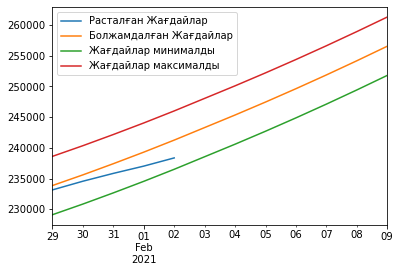

In [59]:
df_forecast.iloc[:,:4].plot()

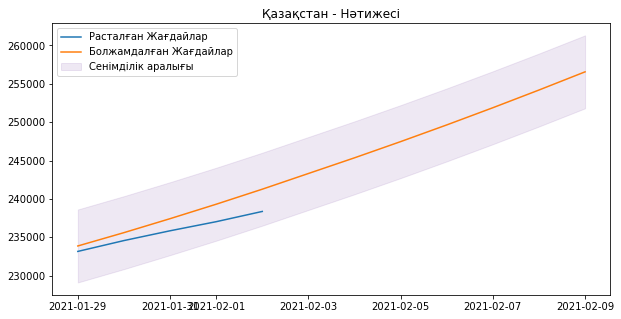

In [60]:
fig= plt.figure(figsize=(10,5))
plt.title("{} - Нәтижесі".format("Қазақстан"))
plt.plot(df_forecast.index,df_forecast["Расталған Жағдайлар"],label="Расталған Жағдайлар")
plt.plot(df_forecast.index,df_forecast["Болжамдалған Жағдайлар"],label="Болжамдалған Жағдайлар")
plt.fill_between(df_forecast.index,df_forecast["Жағдайлар минималды"],df_forecast["Жағдайлар максималды"],color="indigo",alpha=0.09,label="Сенімділік аралығы")
plt.legend()
plt.show()